# 6.5 Unsupervised ML: clustering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Create path 
path = r'/Users/milenafagandini/Desktop/Airbnb /02 Data '

In [5]:
# Import airbnb data 
df = pd.read_csv(os.path.join(path, 'dataset_cleaned.csv'), index_col = False)

In [6]:
df.shape

(35172, 15)

In [7]:
df.head()


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,palermo,-34.581840,-58.424150,Entire home/apt,67518.0,3,44,1,300,5
1,1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,Mar√≠a,palermo,-34.586170,-58.410360,Entire home/apt,22375.0,7,123,6,44,8
2,2,15074,ROOM WITH RIVER SIGHT,59338,Monica,nu√±ez,-34.538920,-58.465990,Private room,39908.0,29,0,1,0,0
3,3,16695,DUPLEX LOFT 2 - SAN TELMO,64880,Elbio Mariano,monserrat,-34.614390,-58.376110,Entire home/apt,52511.0,2,45,9,365,0
4,4,20062,PENTHOUSE /Terrace & pool /City views /2bedrooms,75891,Sergio,palermo,-34.581848,-58.441605,Entire home/apt,113360.0,2,330,4,209,25


In [8]:
# Drop any columns whose name starts with 'Unnamed'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm'],
      dtype='object')

In [10]:
 #Create a mapping for renaming columns:
# For each column, if the column is "price", assign a "Y" prefix.
# Otherwise, assign a sequential "X" prefix.
new_names = {}
x_count = 1
for col in df.columns:
    if col == 'price':
        new_names[col] = f"Y {col}"
    else:
        new_names[col] = f"X{x_count} {col}"
        x_count += 1

# Rename the columns with the new names
df.rename(columns=new_names, inplace=True)

# Display the first few rows to verify changes
print(df.head())

   X1 id                                           X2 name  X3 host_id  \
0  11508                Amazing Luxurious Apt-Palermo Soho       42762   
1  14222      RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES    87710233   
2  15074                             ROOM WITH RIVER SIGHT       59338   
3  16695                         DUPLEX LOFT 2 - SAN TELMO       64880   
4  20062  PENTHOUSE /Terrace & pool /City views /2bedrooms       75891   

    X4 host_name X5 neighbourhood  X6 latitude  X7 longitude     X8 room_type  \
0        Candela          palermo   -34.581840    -58.424150  Entire home/apt   
1         Mar√≠a          palermo   -34.586170    -58.410360  Entire home/apt   
2         Monica           nu√±ez   -34.538920    -58.465990     Private room   
3  Elbio Mariano        monserrat   -34.614390    -58.376110  Entire home/apt   
4         Sergio          palermo   -34.581848    -58.441605  Entire home/apt   

    Y price  X9 minimum_nights  X10 number_of_reviews  \
0   67518.0

### 2. The elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [60]:
df.dtypes

X1 id                                   int64
X2 name                                object
X3 host_id                              int64
X4 host_name                           object
X5 neighbourhood                       object
X6 latitude                           float64
X7 longitude                          float64
X8 room_type                           object
Y price                               float64
X9 minimum_nights                       int64
X10 number_of_reviews                   int64
X11 calculated_host_listings_count      int64
X12 availability_365                    int64
X13 number_of_reviews_ltm               int64
dtype: object

In [62]:
# Drop the 'name' and 'host_name' columns
df_processed = df.drop(columns=['X2 name', 'X4 host_name'])

# Convert categorical variables to numerical using one-hot encoding
# Specifically for 'X5 neighbourhood' and 'X8 room_type'
df_processed = pd.get_dummies(df_processed, columns=['X5 neighbourhood', 'X8 room_type'])


In [64]:
#Normalize numeric columns 
from sklearn.preprocessing import StandardScaler

# Select numeric columns from df_processed
numeric_cols = df_processed.select_dtypes(include='number').columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

# Verify by printing the first few rows
print(df_processed.head())


      X1 id  X3 host_id  X6 latitude  X7 longitude   Y price  \
0 -1.470361   -1.056958     0.532056     -0.227418 -0.016789   
1 -1.470361   -0.624543     0.294882      0.229686 -0.050742   
2 -1.470361   -1.056876     2.882977     -1.614311 -0.037555   
3 -1.470361   -1.056849    -1.250854      1.364989 -0.028076   
4 -1.470361   -1.056794     0.531618     -0.806008  0.017690   

   X9 minimum_nights  X10 number_of_reviews  \
0          -0.121200               0.353755   
1           0.032224               2.103439   
2           0.876053              -0.620752   
3          -0.159555               0.375903   
4          -0.159555               6.688053   

   X11 calculated_host_listings_count  X12 availability_365  \
0                           -0.429424              0.740096   
1                           -0.282832             -1.288635   
2                           -0.429424             -1.637323   
3                           -0.194876              1.255203   
4                

In [66]:
cluster_range = range(1, 10)
scores = []

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_processed)
    scores.append(model.score(df_processed))

print("Scores for different cluster counts:", scores)

Scores for different cluster counts: [-387459.88070055726, -347099.82078515505, -316860.6779165693, -289181.9081839233, -257798.63417807635, -234934.292376131, -221856.71384696264, -213937.11882534152, -206863.1584377724]


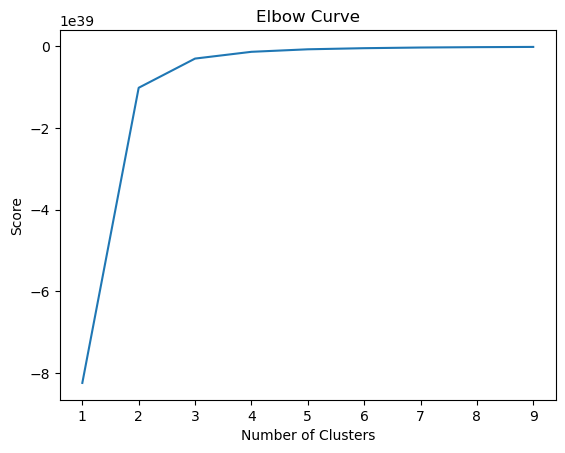

In [68]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### From the big jump, we can see that the optimal number of clusters is 3 

### 3. k-means clustering

In [70]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [72]:
# Fit the k-means object to the data.

kmeans.fit(df_processed)

KMeans(n_clusters=3)

In [74]:
df_processed['clusters'] = kmeans.fit_predict(df_processed)

In [22]:
df_processed.head()

,X1 id,X3 host_id,X6 latitude,X7 longitude,Y price,X9 minimum_nights,X10 number_of_reviews,X11 calculated_host_listings_count,X12 availability_365,X13 number_of_reviews_ltm,...,X5 neighbourhood_villa real,X5 neighbourhood_villa riachuelo,X5 neighbourhood_villa santa rita,X5 neighbourhood_villa soldati,X5 neighbourhood_villa urquiza,X8 room_type_Entire home/apt,X8 room_type_Hotel room,X8 room_type_Private room,X8 room_type_Shared room,clusters
0,11508,42762,-34.581840,-58.424150,67518.0,3,44,1,300,5,...,False,False,False,False,False,True,False,False,False,1
1,14222,87710233,-34.586170,-58.410360,22375.0,7,123,6,44,8,...,False,False,False,False,False,True,False,False,False,1
2,15074,59338,-34.538920,-58.465990,39908.0,29,0,1,0,0,...,False,False,False,False,False,False,False,True,False,1
3,16695,64880,-34.614390,-58.376110,52511.0,2,45,9,365,0,...,False,False,False,False,False,True,False,False,False,1
4,20062,75891,-34.581848,-58.441605,113360.0,2,330,4,209,25,...,False,False,False,False,False,True,False,False,False,1


In [23]:
df_processed['clusters'].value_counts()

clusters
2    14012
0    11016
1    10144
Name: count, dtype: int64

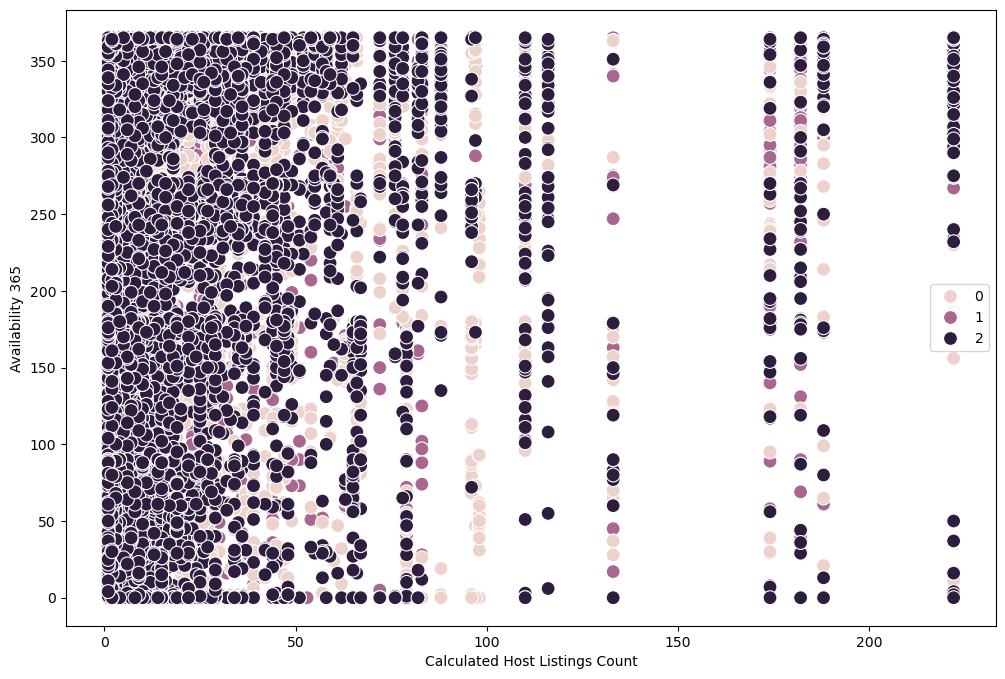

In [24]:
# Plot the clusters for the "calculated_host_listings_count" and "availability_365" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    x=df_processed['X11 calculated_host_listings_count'], 
    y=df_processed['X12 availability_365'], 
    hue=kmeans.labels_, 
    s=100
)
ax.grid(False)  # Removes the grid from the background.
plt.xlabel('Calculated Host Listings Count')  # Label x-axis.
plt.ylabel('Availability 365')  # Label y-axis.
plt.show()


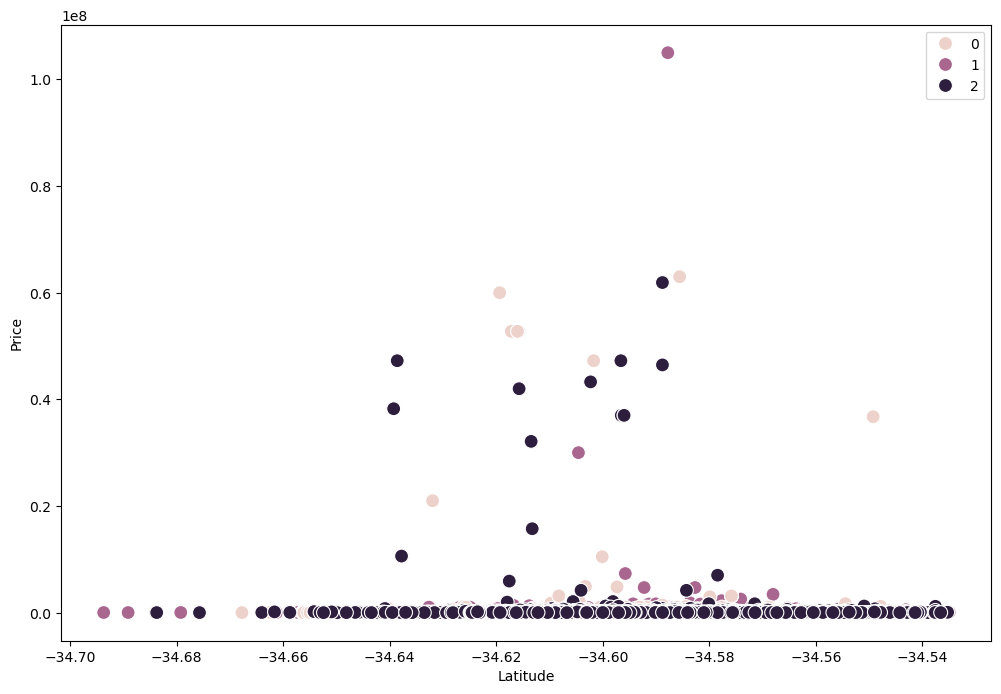

In [25]:
# now for price and latitude 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(
    x=df_processed['X6 latitude'], 
    y=df_processed['Y price'], 
    hue=kmeans.labels_, 
    s=100
)
ax.grid(False)  # Removes the grid from the background.
plt.xlabel('Latitude')   # Label x-axis.
plt.ylabel('Price')      # Label y-axis.
plt.show()

### There are still no trends that can be identified 

In [27]:
df_processed.loc[df_processed['clusters'] == 2, 'cluster'] = 'dark purple'
df_processed.loc[df_processed['clusters'] == 1, 'cluster'] = 'purple'
df_processed.loc[df_processed['clusters'] == 0, 'cluster'] = 'pink'


In [28]:
aggregated = df_processed.groupby('cluster').agg({
    'X6 latitude': ['mean', 'median'],
    'X7 longitude': ['mean', 'median'],
    'Y price': ['mean', 'median'],
    'X9 minimum_nights': ['mean', 'median'],
    'X11 calculated_host_listings_count': ['mean', 'median'],
    'X12 availability_365': ['mean', 'median'],
})

print(aggregated)

            X6 latitude            X7 longitude                  Y price  \
                   mean     median         mean     median          mean   
cluster                                                                    
dark purple  -34.591928 -34.591689   -58.417100 -58.417880  95387.394305   
pink         -34.591140 -34.590315   -58.418754 -58.421010  88769.455065   
purple       -34.591486 -34.590380   -58.415960 -58.417609  83340.013900   

                     X9 minimum_nights         \
              median              mean median   
cluster                                         
dark purple  39761.0          4.459535    2.0   
pink         39908.0          5.774601    2.0   
purple       39908.0          8.926952    3.0   

            X11 calculated_host_listings_count        X12 availability_365  \
                                          mean median                 mean   
cluster                                                                      
dark purple   

# Takeaways 
#### The mean and median values for X6 latitude and X7 longitude are very similar across clusters. This indicates that, regardless of cluster, the listings are all located in a very similar geographic area
#### The Y Price variable shows noticeable differences. The purple cluster has the highest average price (≈95K), followed by the dark purple cluster (≈89K), and the pink cluster has the lowest (≈83K). This suggests that the
purple cluster might represent more premium or high-demand listings.
#### For X11 calculated_host_listings_count, the dark purple cluster shows the highest average (≈18.5) compared to purple (≈15.9) and pink (≈12.2). This might mean that hosts in the dark purple cluster manage more listings on average, which could be related to a more commercial operation.



# To be analyzed 
### Premium vs. Budget Segments: The clusters differentiate listings by price and host activity. For example, the purple cluster shows higher prices and availability, which might be targeted for premium marketing or dynamic pricing strategies. Conversely, the pink cluster with lower prices and longer minimum night stays could be promoted as budget-friendly or long-term options.
### Host Performance Insights: The dark purple cluster, which shows higher average numbers of listings per host, might indicate commercial or professional operators. This insight could inform decisions about support services, loyalty programs, or partnerships with high-volume hosts.
